In [37]:

!pip install contractions

import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup                           

import numpy as np                                      
import pandas as pd                                     
import nltk                                             

nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer   

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Text analysis/Tweets.csv")

In [40]:
data.shape  

(14640, 15)

In [41]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [42]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [43]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [44]:
data1 = data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1)

In [45]:
data1.shape

(14640, 2)

In [46]:
pd.set_option('display.max_colwidth', None)
data1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [47]:
data1.isnull().sum(axis=0)      

airline_sentiment    0
text                 0
dtype: int64

No null data in the columns we are interested in

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

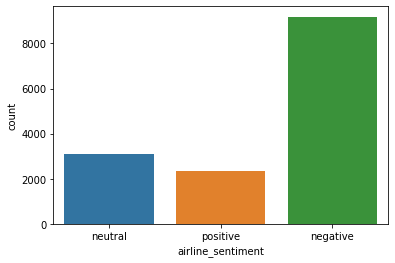

In [49]:
sns.countplot(data=data1, x="airline_sentiment");

*Most of the reviews are of negative sentiment.*

**Html tag removal**

In [50]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data1['text'] = data1['text'].apply(lambda x: strip_html(x))

**Remove the numbers**

In [51]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data1['text'] = data1['text'].apply(lambda x: remove_numbers(x))

**Tokenization**

In [52]:
data1['text'] = data1.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [53]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

**Removal of Special Characters, Conversion to lowercase, Removal of Punctuations, Removal of stop words, Lemmatization, Join the words**

In [54]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data1['text'] = data1.apply(lambda row: normalize(row['text']), axis=1)
data1.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you ve add commercials to the experience tacky
2,neutral,virginamerica i do nt today must mean i need to take another trip
3,negative,virginamerica it s really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,negative,virginamerica and it s a really big bad thing about it


**Vectorization**

***Method 1: CountVectorizer***

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()               
data_features = vectorizer.fit_transform(data1['text'])

data_features = data_features.toarray()                        

In [56]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
data_features.shape

(14640, 12203)

In [58]:
data1 ['airline_sentiment'] = data1['airline_sentiment'].replace({ "negative": -1, "neutral": 0, "positive": 1})

In [59]:
data1.head()

,airline_sentiment,text
0,0,virginamerica what dhepburn say
1,1,virginamerica plus you ve add commercials to the experience tacky
2,0,virginamerica i do nt today must mean i need to take another trip
3,-1,virginamerica it s really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,-1,virginamerica and it s a really big bad thing about it


In [60]:
labels = data1['airline_sentiment']
labels = labels.astype('int')

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state= 21)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7162568306010928


In [63]:
result = forest.predict(X_test)

In [64]:
result

array([-1, -1, -1, ..., -1, -1,  0])

In [65]:
def draw_cm (actual1, predicted1):
    cm = confusion_matrix(actual1, predicted1)
    sns.heatmap(cm, annot=True,  fmt='.2f')
    ax=plt.subplot()
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']);
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']);
    plt.show()

Confusion Matrix


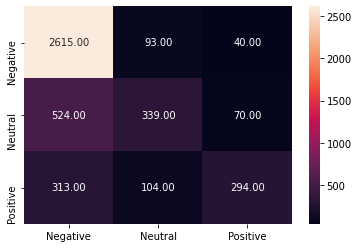

None


In [66]:
print('Confusion Matrix');
print(draw_cm(y_test, result));

***Method 2: TF-IDF Vectorizer***

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf = TfidfVectorizer()
data_features_tf = vectorizer.fit_transform(data1['text'])

data_features_tf = data_features_tf.toarray()

data_features_tf.shape

(14640, 12203)

In [68]:
forest_tf = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest_tf = forest_tf.fit(X_train, y_train)

print(forest_tf)

print(np.mean(cross_val_score(forest_tf, data_features_tf, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7204918032786886


In [69]:
result_tf = forest_tf.predict(X_test)

Confusion Matrix TF-IDF


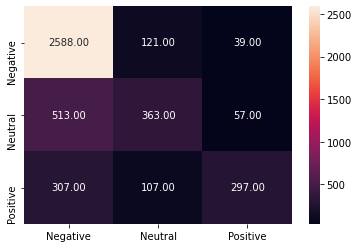

None


In [70]:
print('Confusion Matrix TF-IDF');
print(draw_cm(y_test, result_tf));

**Summary**

The problem in hand is analyzing the sentiment of Twitter data on several US Airlines. Tweets were scraped from Twitter in February 2015 about each major US airline. Contributors then classified each tweet as either “positive”, “neutral”, or “negative”. 

The original text data / reviews had several unwanted characters which are not useful for our modeling purposes. Hence, pre-processing was done to remove them separately. First we removed the HTML tags, then break the sentence into individual words to help removing numbers, special characters. All the words were then made lowercase, removed the stop words to reduce the memory and then Lemmatization was done to remove the prefix and suffixes. Finally the words were converted back to text string.

The next step was vectorization. This is mainly to convert text data into numbers. Two different techniques were tested. A count vectorizer uses the tokenized words for each observation to find out the frequency of each word/token. The TF-IDF gives a weighted individual tokens. 


Finally, both vectorized outputs were fed to Random Forest classifyer. TF-IDF have resulted in slightly higher cross validation score of 72%. From the confusion matrix we can see that there is a large number of mis-classification especially between neutral and negative sentiments. TF-IDF vectorized classifier does a better job in classifying positive and neutral sentiments compared to CountVectorizer. 




In [74]:
!jupyter nbconvert --to html Twitter Twitter_US_Airline_SentimentAnalysis_Venkatesh_Anantharamu.ipynb

[NbConvertApp] WARNING | pattern u'Twitter' matched no files
[NbConvertApp] Converting notebook Twitter_US_Airline_SentimentAnalysis_Venkatesh_Anantharamu.ipynb to html
[NbConvertApp] Writing 372958 bytes to Twitter_US_Airline_SentimentAnalysis_Venkatesh_Anantharamu.html
